# **FINAL PROJECT FOR THE MACHINE LEARNING COURSE**

## **Instruction**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

**The objective of this competition** is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

## **Program**

In [312]:
# Import the dependencies
import numpy as np
import pandas as pd
import scipy.linalg
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sb.set_style()
%matplotlib inline

In [313]:
# Load the training data
df = pd.read_csv("Train.csv")

In [314]:
df.head()

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,2018,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,2018,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,2018,1,0,...,0,1,0,0,0,0,1,0,0,0


In [315]:
df.describe()

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
count,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,...,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000
mean,11761.500000,0.140792,0.390282,0.741966,3.797483,38.805220,0.410092,2016.975939,0.094754,0.545443,...,0.010500,0.237927,0.026654,0.045911,0.107422,0.273635,0.257949,0.371323,0.281415,0.089313
std,6790.938202,0.347815,0.487824,0.437562,2.227613,16.520569,0.491861,0.847371,0.292881,0.497941,...,0.101932,0.425823,0.161072,0.209296,0.309656,0.445834,0.437515,0.483169,0.449699,0.285201
min,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,2016.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5880.750000,0.000000,0.000000,0.000000,2.000000,26.000000,0.000000,2016.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11761.500000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,2017.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17642.250000,0.000000,1.000000,1.000000,5.000000,49.000000,1.000000,2018.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,23523.000000,1.000000,1.000000,1.000000,21.000000,100.000000,1.000000,2018.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 39 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Unnamed: 0                                       23524 non-null  int64
 1   bank_account                                     23524 non-null  int64
 2   location_type                                    23524 non-null  int64
 3   cellphone_access                                 23524 non-null  int64
 4   household_size                                   23524 non-null  int64
 5   age_of_respondent                                23524 non-null  int64
 6   gender_of_respondent                             23524 non-null  int64
 7   year_                                            23524 non-null  int64
 8   relationship_with_head_Child                     23524 non-null  int64
 9   relationship_with_head_Head of Household         2

In [317]:
# visualize the train data
df

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,2018,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,2018,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,2018,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,0,1,4,48,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,2018,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,2018,0,0,...,0,0,0,0,0,1,0,0,0,1


In [318]:
cluster_data = df[['bank_account', 'gender_of_respondent', 'age_of_respondent', 'education_level_No formal education', 'education_level_Other/Dont know/RTA', 'education_level_Primary education', 'education_level_Secondary education', 'education_level_Tertiary education', 'education_level_Vocational/Specialised training']].copy(deep=True)
# cluster_data = df[['bank_account', 'year_']].copy(deep=True)
# cluster_data = df
cluster_data.dropna(axis=0, inplace=True)

In [319]:
cluster_data

,bank_account,gender_of_respondent,age_of_respondent,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training
0,1,0,24,0,0,0,1,0,0
1,0,0,70,1,0,0,0,0,0
2,1,1,26,0,0,0,0,0,1
3,0,0,34,0,0,1,0,0,0
4,0,1,26,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
23519,0,0,48,1,0,0,0,0,0
23520,0,0,27,0,0,0,1,0,0
23521,0,0,27,0,0,1,0,0,0
23522,0,0,30,0,0,0,1,0,0


In [320]:
cluster_array = np.array(cluster_data)
cluster_array

array([[ 1,  0, 24, ...,  1,  0,  0],
       [ 0,  0, 70, ...,  0,  0,  0],
       [ 1,  1, 26, ...,  0,  0,  1],
       ...,
       [ 0,  0, 27, ...,  0,  0,  0],
       [ 0,  0, 30, ...,  1,  0,  0],
       [ 0,  1, 20, ...,  1,  0,  0]])

In [321]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [322]:
import random
random.sample(range(0, len(cluster_array)), 4)

[11131, 13737, 23365, 5671]

In [323]:
i_centroid = random.sample(range(0, len(cluster_array)), 4)

In [324]:
i_centroid

[2392, 15697, 15581, 5272]

In [325]:
initial_centroids = []
for i in i_centroid:
    initial_centroids.append(cluster_array[i])
initial_centroids

[array([ 0,  1, 32,  0,  0,  1,  0,  0,  0]),
 array([ 0,  1, 35,  1,  0,  0,  0,  0,  0]),
 array([ 0,  0, 17,  0,  0,  1,  0,  0,  0]),
 array([ 0,  1, 21,  0,  0,  1,  0,  0,  0])]

In [326]:
ic = np.array(initial_centroids)

In [327]:
ic

array([[ 0,  1, 32,  0,  0,  1,  0,  0,  0],
       [ 0,  1, 35,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  1,  0,  0,  0],
       [ 0,  1, 21,  0,  0,  1,  0,  0,  0]])

In [328]:
ic[:, 0]

array([0, 0, 0, 0])

In [329]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [330]:
centroids = findClosestCentroids(initial_centroids, cluster_array)

In [331]:
centroids

[3,
 1,
 3,
 1,
 3,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 0,
 1,
 3,
 3,
 0,
 1,
 3,
 2,
 3,
 3,
 0,
 3,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 1,
 2,
 2,
 3,
 1,
 1,
 0,
 3,
 0,
 0,
 1,
 1,
 3,
 3,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 0,
 1,
 2,
 3,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 3,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 3,
 1,
 0,
 3,
 1,
 1,
 1,
 2,
 3,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 3,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 3,
 0,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 3,
 2,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 0,
 1,
 3,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 3,
 1,
 0,
 0,
 1,
 3,
 3,


In [332]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

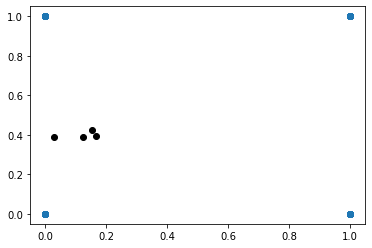

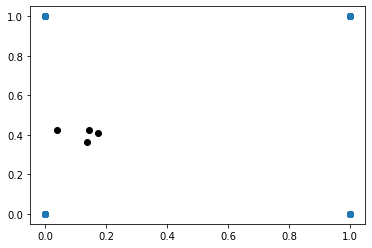

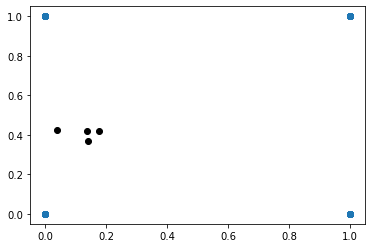

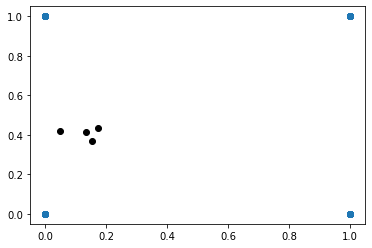

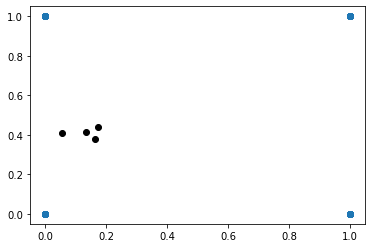

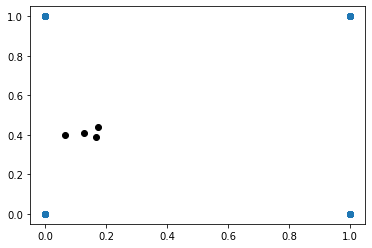

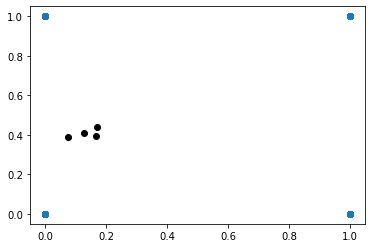

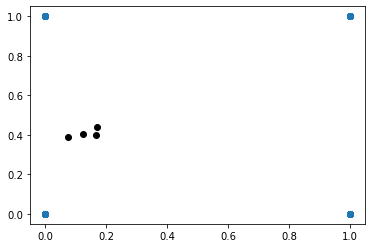

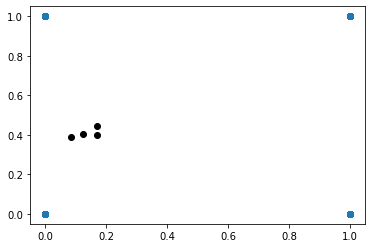

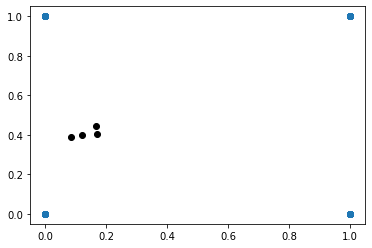

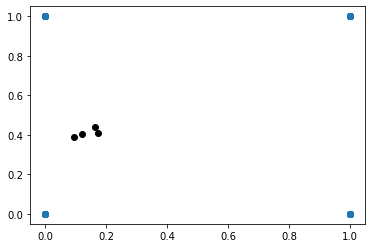

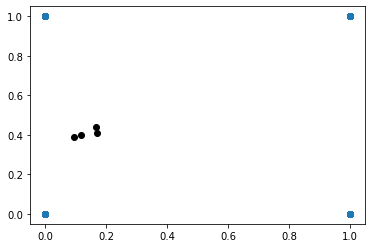

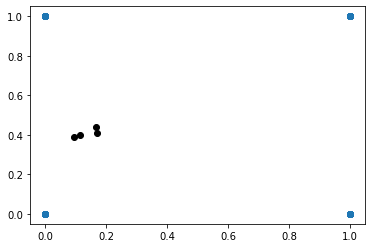

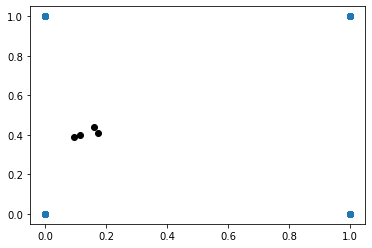

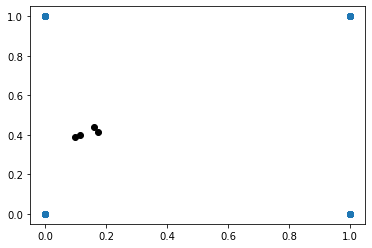

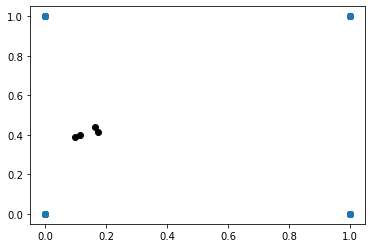

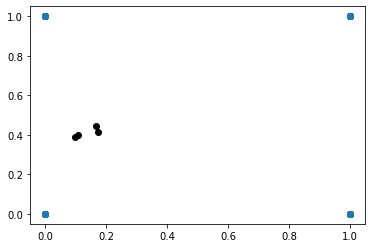

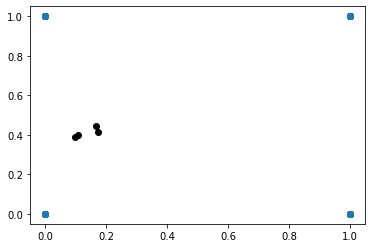

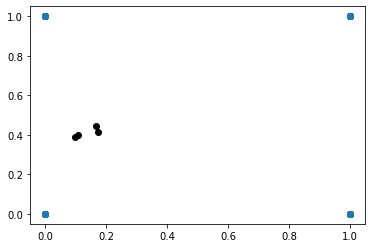

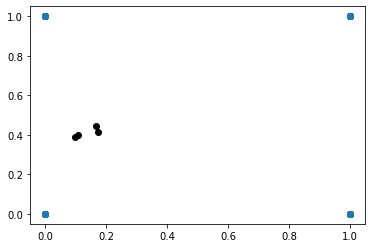

In [333]:
centroids = initial_centroids
for i in range(20):
    get_centroids = findClosestCentroids(centroids, cluster_array)
    centroids = calc_centroids(get_centroids, cluster_array)
    #print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(cluster_array[:, 0], cluster_array[:, 1], alpha=0.1)
    plt.show()

#### Andrew Ng's dataset

In [334]:
df1 = pd.read_csv('test.csv', header=None)

In [335]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,NaN,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
1,0.0,1,1,3,30,1,2018,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,1,1,7,51,1,2018,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,2.0,0,0,3,77,0,2018,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,3.0,0,0,6,39,0,2018,0,1,0,...,0,0,0,0,1,0,1,0,0,0


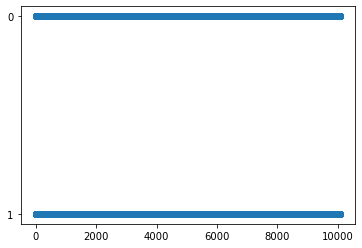

In [336]:
plt.figure()
plt.scatter(df1[0], df1[1])
plt.show()

In [337]:
init_centroids = random.sample(range(0, len(df1)), 3)

In [338]:
init_centroids

[10063, 7328, 3868]

In [339]:
init_centroids = [95, 30, 17]

In [340]:
centroids = []
for i in init_centroids:
    centroids.append(df1.loc[i])
centroids

[0     94.0
 1        0
 2        1
 3        7
 4       36
 5        1
 6     2018
 7        0
 8        1
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       1
 16       0
 17       0
 18       0
 19       0
 20       1
 21       0
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       1
 30       0
 31       0
 32       0
 33       0
 34       1
 35       0
 36       0
 37       0
 Name: 95, dtype: object,
 0     29.0
 1        1
 2        1
 3        4
 4       21
 5        0
 6     2018
 7        1
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       1
 17       0
 18       0
 19       0
 20       0
 21       1
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       0
 30       0
 31       0
 32       1
 33       0
 34       1
 35       0
 36       0
 37       0
 Name: 30, dtype: object,
 0     16.0
 1        0
 2        1


In [341]:
centroids = np.array(centroids)

In [342]:
X = np.array(df1)

In [343]:
centroids

array([[94.0, '0', '1', '7', '36', '1', '2018', '0', '1', '0', '0', '0',
        '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0',
        '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0'],
       [29.0, '1', '1', '4', '21', '0', '2018', '1', '0', '0', '0', '0',
        '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0'],
       [16.0, '0', '1', '5', '35', '1', '2018', '0', '1', '0', '0', '0',
        '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0',
        '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0']],
      dtype=object)

In [344]:
get_centroids = findClosestCentroids(centroids, X)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

# **FAUX**

In [ ]:
points = cluster_data["bank_account"]

In [ ]:
points

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

In [ ]:
# Import kmeans
from sklearn.cluster import KMeans

In [ ]:
# create a KMeans object
kmeans = KMeans(n_clusters=2)

In [ ]:
# KMeans.fit(points, 1)